In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import sys

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [2]:
ddir = "../data/prl_rot_curve_data_2024-05-20_15-29-46.csv"
cols = ["n", "lam", "beta", "H1", "H1_std", "int1", "int1_std", "int2", "int2_std", "int3", "int3_std", "rng", "eps", "l", "Tsteps", "steps", "stepsPerMeasurement", "sign", "sign_std", "q", "qmax", "time"]
df = pd.read_csv(ddir, names=cols, skiprows=1)
# add fid sus column
df['fidsus'] = df.int3 - (df.beta*df.H1)**2/8
exact = np.array([-0.7099133855459768, 6.609155439246638, 16.522888597795358, 4.053481186458256, 2.478553014654032])

In [3]:
df.head()

,n,lam,beta,H1,H1_std,int1,int1_std,int2,int2_std,int3,...,l,Tsteps,steps,stepsPerMeasurement,sign,sign_std,q,qmax,time,fidsus
0,2,1.0,5.0,-0.708980,0.002874,6.594159,0.027275,16.485358,0.068195,4.043235,...,0,100000,1000000,10,1.00000,0.000000,0.33150,6,1.72,2.472445
1,100,1.0,5.0,-0.697648,0.010622,6.480267,0.090567,16.200774,0.226416,3.972080,...,121,100000,1000000,10,0.99954,0.000189,0.32407,4,10.05,2.451101
2,2,1.0,5.0,-0.713380,0.003307,6.632238,0.030233,16.580596,0.075584,4.066240,...,0,100000,1000000,10,1.00000,0.000000,0.33384,6,1.69,2.475893
3,100,1.0,5.0,-0.713053,0.010472,6.640753,0.097107,16.601781,0.242719,4.073090,...,78,100000,1000000,10,0.99838,0.000287,0.34512,5,28.34,2.484200
4,2,1.0,5.0,-0.708700,0.003002,6.581497,0.028291,16.453722,0.070729,4.033866,...,0,100000,1000000,10,1.00000,0.000000,0.33708,6,1.72,2.464317


In [4]:
df100 = df[df.n == 100]
df2 = df[df.n == 2]

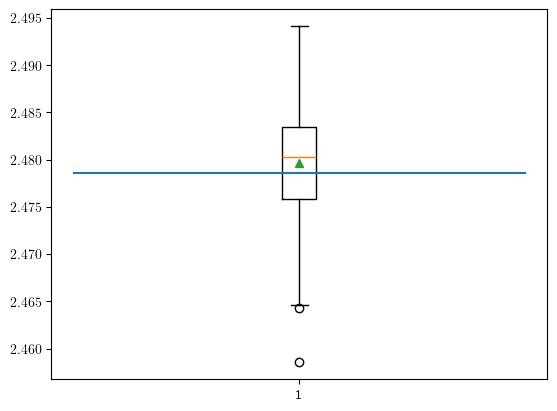

In [5]:
plt.boxplot(df2.fidsus, showmeans=True)
plt.plot([0, 1, 2], [exact[-1] for _ in range(3)])

## Pick out those instances that agree with each observable

In [6]:
h1_cond = np.abs(df100.H1 - exact[0]) < 2 * df100.H1_std
int1_cond = np.abs(df100.int1 - exact[1]) < 2 * df100.int1_std
int2_cond = np.abs(df100.int2 - exact[2]) < 2 * df100.int2_std
int3_cond = np.abs(df100.int3 - exact[3]) < 2 * df100.int3_std

fidsus_pdiff = (np.abs(df100.fidsus - exact[4]) / exact[4]) * 100
df100["fidsus_pdiff"] = fidsus_pdiff
close_cond = (np.abs(df100.fidsus - exact[4]) / exact[4]) * 100 < 5
df100["close"] = close_cond

/var/folders/2w/_70fq7w11c36fkhz8pnqp8gw0000gp/T/ipykernel_65596/121899426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100["fidsus_pdiff"] = fidsus_pdiff
/var/folders/2w/_70fq7w11c36fkhz8pnqp8gw0000gp/T/ipykernel_65596/121899426.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100["close"] = close_cond


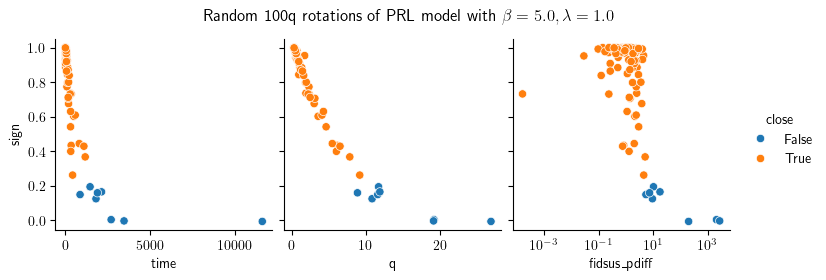

In [7]:
g = sns.pairplot(df100, y_vars="sign", x_vars=["time", "q", "fidsus_pdiff"], hue="close")
g.fig.suptitle(r"Random 100q rotations of PRL model with $\beta = 5.0, \lambda = 1.0$", y=1.08)
plt.xscale("log")
#plt.savefig("prl_rot_close_check_plot.jpg", bbox_inches="tight")

In [8]:
sum(close_cond)

92

In [9]:
sign_sort = df100.sort_values("sign", ascending=False)

In [10]:
signs = np.array(sign_sort.sign)
errs = np.array(sign_sort.sign_std)

## Extract random seeds with highest signs

In [11]:
best_sign_rng = np.array(sign_sort.rng)[0:10]
best_sign_rng

array([3026438146, 2781301355, 4206712692, 2270171661, 2834120170,
       1370102282, 2172515818,  185933287, 4109413259, 3629902865])

In [12]:
sum(200 * np.array(sign_sort.time)[0:10]) / (60 * 60)

8.739444444444445

In [13]:
print(np.mean(signs[0:10]), 2*np.std(signs[0:10]))

0.999464 0.0008976057040816942


In [14]:
min(signs[0:10])

0.99838

In [15]:
signs[9]

0.99838

In [16]:
2*errs[9]

0.000573520096